# Assignment 3

In the third assignment you will cluster hand-written digits using k-means. This is an unsupervised method and will therefore differ a bit from the previous assignments. 
You will also have to analyse the behavior of K-means for different parameter settings and initializations.

The assignment follows Andrew Ng's explanation of K-means and (re)watching his videos could be useful.

Publish your notebook (ipynb file) to your repository on Github. If you have any questions, please email Gosia and Rein and don't forget to commit the most recent version of you assignment on Github so that we can see your code.

Note: all code should be clear, add comments where necessary (especially if your code is not straightforward). You are free to discuss the assignment among each other, but stick to sharing ideas, not code.

### Deadline: December 1, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dataset is the same as with logistic regression. However, you don't need to use the class labels as K-means is an unsupervised method.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


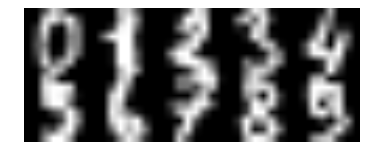

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

#Show both rows at the same time using nearest-neighbor interpolation (pixelated image)
#plt.imshow(np.vstack((firstrow,secondrow)),  interpolation="nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## Visualize functions

In order to make it more visible what K-means is learning, we provide two visualization functions. The first function takes the assignment of each digit to each cluster and shows what the digits of the cluster look like. If your algorithm works well then the digits should look alike!

The second function visualizes the actual cluster centroids. It is expected that you see something that resembles the original digit, but don't be surprised if one of the results is a combination, e.g. a zero and eight at the same time.

K-means is a very simple algorithm and is not likely to get an optimal result, therefore some of the centroids will be just noise. 

In [3]:
#With below code you can visualize the data clusters
#The input is a vector c (with all the datapoints assigned to a cluster)
#this function will show a bunch of numbers assigned to that cluster.
#It will skip the cluster if there are not enough images in it.

#You can use this code after you have finished implementing everything!
def visualize(best_c):
    for i in range(10):
        print "There are ", np.sum(best_c == i), " elements in cluster ", i
    
    for cluster in range(10):
        #Create two rows with numbers
        filtered = digits.images[best_c == cluster,:,:]

        if filtered.shape[0] < 5:
            print "not enough items in cluster ", cluster
            continue

        rows = np.floor(filtered.shape[0]/10)
        image_rows = []

        for i in range(min(5,int(rows))):
            image_row = np.hstack(filtered[i*10:(i+1)*10,:,:])
            image_rows.append(image_row)

        plt.gray()
        plt.axis('off')

        #Show both rows at the same time
        plt.imshow(np.vstack(image_rows))
        plt.show()

        print "The cluster shown above is: ", cluster

In [4]:
# This function visualizes the centroids. 
# It takes as input the matrix mu with the cluster centroids and shows an image.

#You can use this code after you have finished implementing everything!
def visualize_centroids(best_mu):
    mu = best_mu.T.reshape(10,8,8)
    
    #Create two rows with numbers
    firstrow = np.hstack(mu[:5,:,:])
    secondrow = np.hstack(mu[5:,:,:])

    plt.gray()
    plt.axis('off')

    #Show both rows at the same time
    plt.imshow(np.vstack((firstrow,secondrow)))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of k-means. Please follow Andrew Ng's description and the instructions that come with the functions closely. 

Think about the problem one step at a time. First focus on implementing the functions and only then start thinking about how they all come together. The skeleton code will guide you to make sure that it will come together. 

Grading:
- Working version of compute_centroid, update_centroid and cost_function (0.5 point each)
- A working triple loop that successfully learns and stores the best result (3 points)
- Correct use of both visualization functions on your best result and an explanation how you got to the best result and why it is necessary to have many initializations (1.5 points)

In [5]:
def compute_centroid(x, mu):
    """Takes as input 1 image x and the cluster centroids mu. 
    It returns a number that is the closest centroid (index of the closest centroid).
    
    mu     :  array of shape (64, k)
    x      :  array of shape (64,)
    output :  number
    k is the amount of clusters/centroids.
    """
    # Substract x from mu, this requires transposing x. Numpy will broadcast x over mu
    dif = mu - np.reshape(x, (64, 1))
    #Then you can take the norm over the columns
    dist = np.linalg.norm(dif, axis=0)
    #print dist
    #return the index of the closest centroid
    return argmin(dist)

# Use these and the commented print statement to check the code is working.
mu = np.random.uniform(0,16,(64,10))
x = np.reshape(digits.images[:1],(1,64))
compute_centroid(x, mu)




2

In [6]:

def update_centroid(centroid, mu, X_c):
    """Takes a cluster number (centroid), the cluster centroids (mu) and all datapoints
    assigned to that cluster (X_c)
    
    centroid : number
    mu       : array of shape (64, k)
    X_c      : (n, 64) n is the amount of examples assigned to the cluster.
    output   : array (64, k)
    """
    # average over the columns in X_c 
    ave = np.mean(X_c, axis=0)
    #and change only 1 specific column in mu
    mu[:, centroid] = ave
    #return the updated mu matrix
    return mu


In [7]:
def cost_function(x, mu):
    """Takes as input 1 image x and the cluster centroids mu. 
    It returns the distance to the closest centroid.
    
    mu    :  array of shape (64, k)
    x     :  array of shape (1, 64)
    ouput :  number
    """
    # Substract x from mu, this requires transposing x. Numpy will broadcast x over mu
    dif = mu - np.reshape(x, (64, 1))
    #Then you can take the norm over the columns
    dist = np.linalg.norm(dif, axis=0)
    #return the distance to the closest centroid
    return dist[argmin(dist)]

Initilizations is:  5
Best cost is:  25.9147189516  Initilization is:  1
Best train_cost is:  24.7295913397  Initilization is:  3
The final test_cost for initilization  0  is:  25.9168879407
The final test_cost for initilization  1  is:  26.0225160393
The final test_cost for initilization  2  is:  26.272866342
The final test_cost for initilization  3  is:  25.8956620079
The final test_cost for initilization  4  is:  26.179042435
The final test_cost for initilization  5  is:  25.9636432591
The final test_cost for initilization  6  is:  25.9180664163
The final test_cost for initilization  7  is:  26.7215436237
The final test_cost for initilization  8  is:  26.0379051652
The final test_cost for initilization  9  is:  26.0223118529
Initilizations is:  10
Best cost is:  25.8956620079  Initilization is:  3
Best train_cost is:  24.7266373284  Initilization is:  1
Initilizations is:  50
Best cost is:  25.9176856654  Initilization is:  27
Best train_cost is:  24.726713268  Initilization is:  6


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 1500


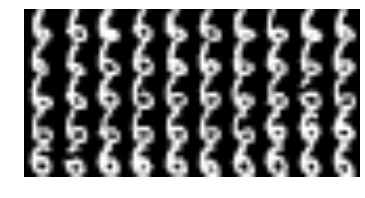

The cluster shown above is:  0


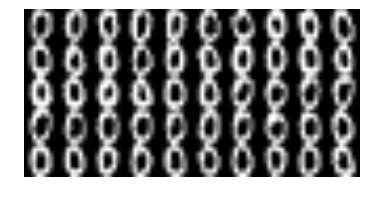

The cluster shown above is:  1


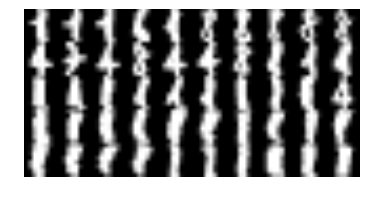

The cluster shown above is:  2


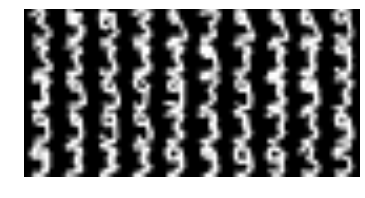

The cluster shown above is:  3


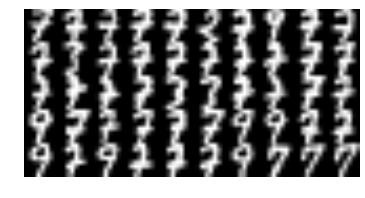

The cluster shown above is:  4


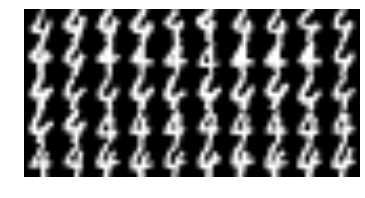

The cluster shown above is:  5


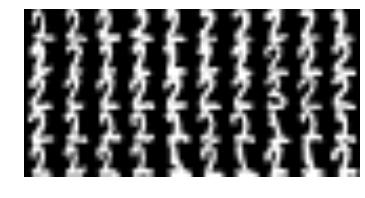

The cluster shown above is:  6


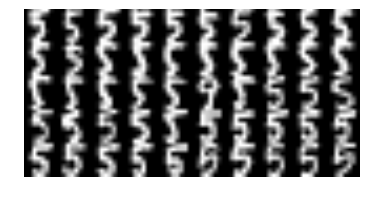

The cluster shown above is:  7


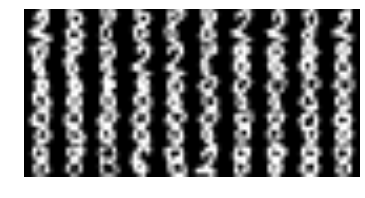

The cluster shown above is:  8


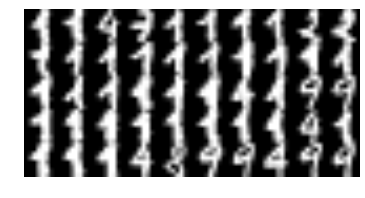

The cluster shown above is:  9
There are  171  elements in cluster  0
There are  137  elements in cluster  1
There are  155  elements in cluster  2
There are  171  elements in cluster  3
There are  117  elements in cluster  4
There are  151  elements in cluster  5
There are  220  elements in cluster  6
There are  78  elements in cluster  7
There are  153  elements in cluster  8
There are  147  elements in cluster  9


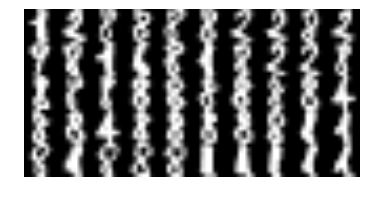

The cluster shown above is:  0


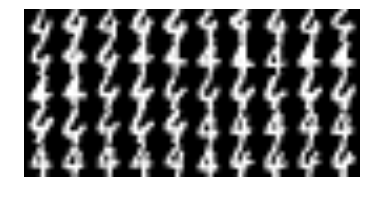

The cluster shown above is:  1


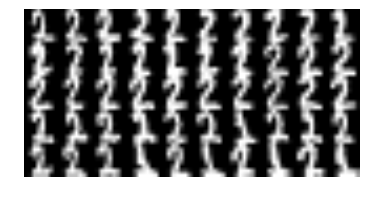

The cluster shown above is:  2


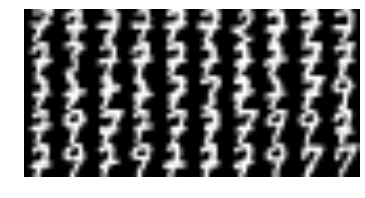

The cluster shown above is:  3


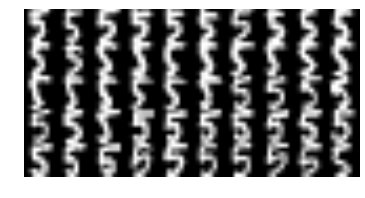

The cluster shown above is:  4


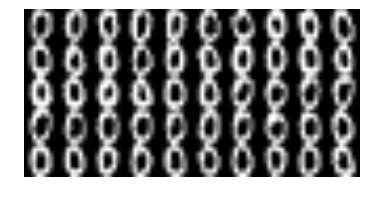

The cluster shown above is:  5


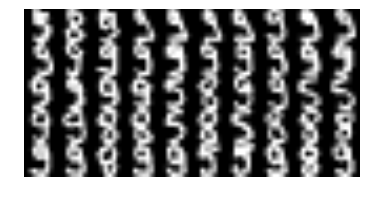

The cluster shown above is:  6


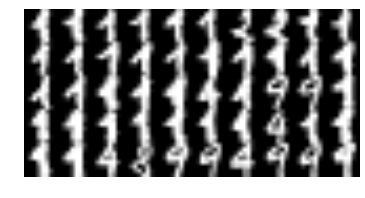

The cluster shown above is:  7


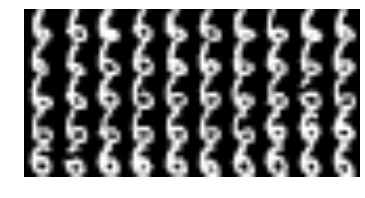

The cluster shown above is:  8


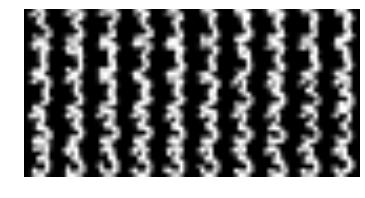

The cluster shown above is:  9


In [19]:
##Now you are going to link it all together again 

x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

#This time the code constists of three layers of loops:
#The first loop is for different initialisations of mu
#The second loop is for the amount of iterations of the k means algorithm
#The third loop actually consists of two loops:
    #Loop 1 updates the centroid of all the clusters
    #Loop 2 assigns a new cluster to each datapoint
def k_means(x, x_test, k=10, init_it=5, iterations=50, print_cost=False, visualized=False):
    """
    Takes a dataset x and amount of clusters k and performs the k_means algortihm.
    It does this for init_it random initializations of mu and a certain amount
    of iterations over the data. It returns the best solution
    
    x           : array (n, 64), n is the amount of training examples
    x_test      : array (m, 64), m is the amount of test examples
    k           : number
    init_it     : number
    iterations  : number
    output      : array (64, k)
    """
    best_mu = 0
    best_mu_train = 0
    best_cost = 0
    best_train_cost = 0
    best_c = 0 
    best_c_train = 0
    init_b = 0
    init_bt = 0
    
    
    for h in range(init_it):
        # mu is the centroid matrix, initialized by sampling from a uniform distribution (shape is 64 by k)
        mu = np.random.uniform(0,16,(64,k))

        # c is the vector that assigns each digit to a centroid
        # initialized with integers between 0 and k, the shape is n by nothing
        c = np.random.randint(0, k, (x.shape[0]))
        
        for j in range(iterations):
            #Updates the centroid of all the clusters
            for i in range(k):
                # x[c==i] creates an array for all eaxmples assigned to cluster i
                mu = update_centroid(i, mu, x[c==i])
            for i in range(x.shape[0]):
                #assign each example to the nearest centroid
                centroid = compute_centroid(x[i,:], mu)
                c[i] = centroid
            
                
        # update best_solution and best_cost
        
        cost = calculate_cost(x_test, mu)
        cost_train = calculate_cost(x, mu)
        if print_cost:
            print "The final test_cost for initilization ", h, " is: ", cost
        if h == 0 or cost < best_cost:
            best_cost = cost
            best_mu = mu  
            best_c = c
            init_b = h
        if h == 0 or cost_train < best_train_cost:
            best_train_cost = cost_train
            best_mu_train = mu
            best_c_train = c
            init_bt = h
           
    print "Initilizations is: ", init_it    
    print "Best cost is: ", best_cost, " Initilization is: ", init_b
    print "Best train_cost is: ", best_train_cost, " Initilization is: ", init_bt

    
    if visualized:
        print "Visualization for test set"
        visualize_centroids(best_mu)
        visualize(best_c)
        print "Visualization for train set"
        visualize_centroids(best_mu_train)
        visualize(best_c_train)
        
    
    return mu

def calculate_cost(x, mu):
    """calculates the cost for a set of examples and a set of centroids.
    
    x      : array (n, 64)
    mu     : array (64, k)
    output : number
    """
    cost_total = 0
    for i in range(x.shape[0]):
        cost_total = cost_total + cost_function(x[i, :], mu)
    return cost_total / x.shape[0]
    
mu_1 = k_means(x, x_test)
mu_2 = k_means(x, x_test, init_it=10, print_cost=True)
mu_3 = k_means(x, x_test, init_it=50, visualized=True)

### Analysis
When I was writing my function my initial thought was to assign every training example to a randomly chosen cluster. However, the results of this were not useful as all examples would be assigned to one cluster. Thus, I had to go back to the initial idea of a random assignment to clusters on the first try, which gave actual results.

I chose to pick my best result on the basis of the cost for my test set and training set.  I tried to plot the cost of my function over the iterations, but it kept giving errors. Instead, I calculated the cost for the test set and the training set at the end of every initilization. I then build in an option to visualize these results. Often, the best result for the test set is different from the best result for a training set. However, as you can see above, the final clusters for both don't differ that much. 

It is important to have many different initializations because they can give very different results. In order to be able to choose the best one you need many. I visualized this in my second call to k-means, which has 10 initializations. We can see that the final cost of every initialization is different. 

I doubt this method is very useful for this problem. If inputs are very similar to each other, but have a different output, they are still clustered in some cases. A better method could be expectation maximization.



## Bonus

There is a special "trick" you can do to make sure all clusters are used. You can do this by initializing the cluster centroids as the first ten digits. Luckily, the dataset x has as first 10 elements the first 10 digits.

Take the code with the three loops, remove the outer loop since you already know the "best" initialization and use the below line of code to initialize mu.

To show:
- Visualize the resulting centroids (Do they still resemble the digits?)
- Plot the cost over iterations and compare this to the original initialization

Max 0.5 points extra, your final amount of points cannot be more than 6.

Note: only attempt this if you're confident you got everything working.

There are  157  elements in cluster  0
There are  146  elements in cluster  1
There are  77  elements in cluster  2
There are  125  elements in cluster  3
There are  172  elements in cluster  4
There are  297  elements in cluster  5
There are  134  elements in cluster  6
There are  105  elements in cluster  7
There are  169  elements in cluster  8
There are  118  elements in cluster  9


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 1500


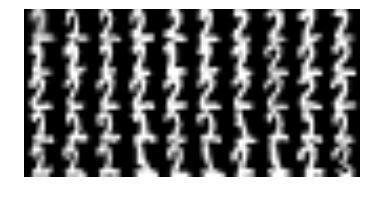

The cluster shown above is:  0


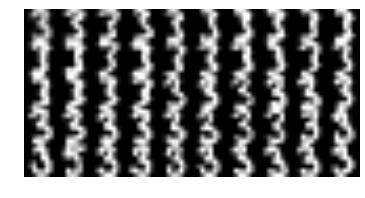

The cluster shown above is:  1


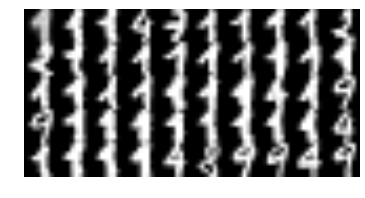

The cluster shown above is:  2


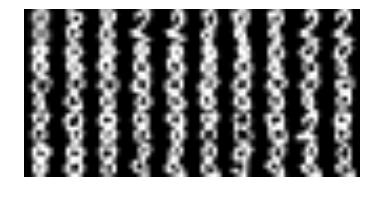

The cluster shown above is:  3


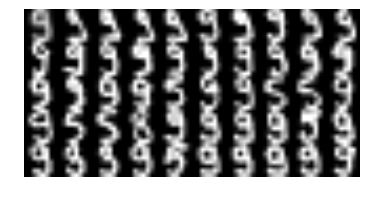

The cluster shown above is:  4


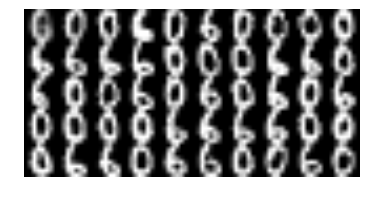

The cluster shown above is:  5


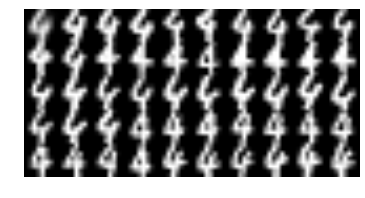

The cluster shown above is:  6


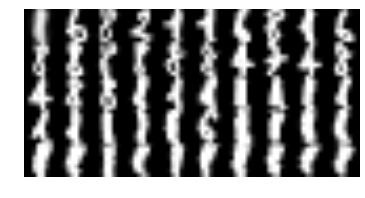

The cluster shown above is:  7


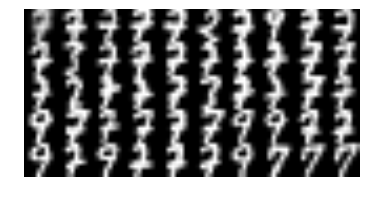

The cluster shown above is:  8


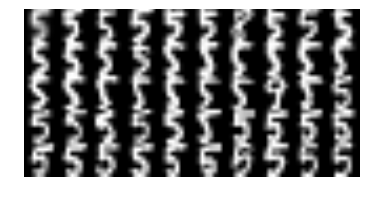

The cluster shown above is:  9
The final cost is:  26.7415970406


In [21]:
#You should initialize mu as:
def k_means_bonus(x, x_test, k=10, iterations=50):
    
    mu = x[:10,:].T

    c = np.random.randint(0, k, (x.shape[0]))
                
    for j in range(iterations):
        #Updates the centroid of all the clusters
        for i in range(k):
            # x[c==i] creates an array for all eaxmples assigned to cluster i
            mu = update_centroid(i, mu, x[c==i])
        for i in range(x.shape[0]):
            #assign each example to the nearest centroid
            centroid = compute_centroid(x[i,:], mu)
            c[i] = centroid

    cost_total = 0
    for i in range(x_test.shape[0]):
        cost_total = cost_total + cost_function(x_test[i, :], mu)
    cost = cost_total / x_test.shape[0]
    
    return mu, c, cost

mu_bonus, c_bonus, cost_bonus = k_means_bonus(x, x_test)
visualize_centroids(mu_bonus)
visualize(c_bonus)
print "The final cost is: ", cost_bonus
